# Check Hard & Soft margin and grid search hyperparameter tuning in SVM on heart disease dataset

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, mean_squared_error,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('HeartAttack.csv')

In [3]:
x = df.drop(columns='num')
y = df['num']

/Users/mainak/miniforge3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mainak/miniforge3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


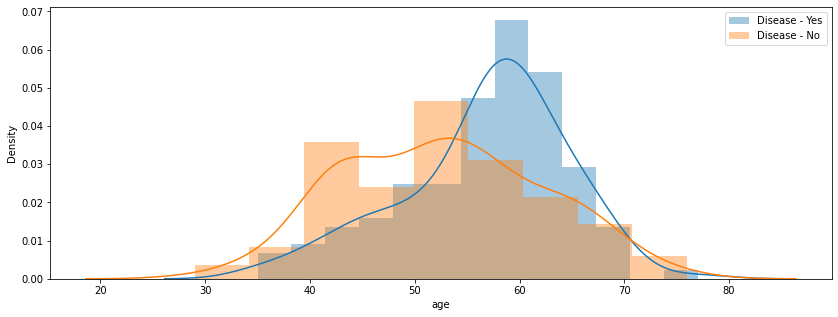

In [4]:
plt.figure(figsize=(14, 5))
sns.distplot(df[df['num'] == 1]['age'], label= "Disease - Yes")
sns.distplot(df[df['num'] == 0]['age'], label= "Disease - No")
plt.legend()

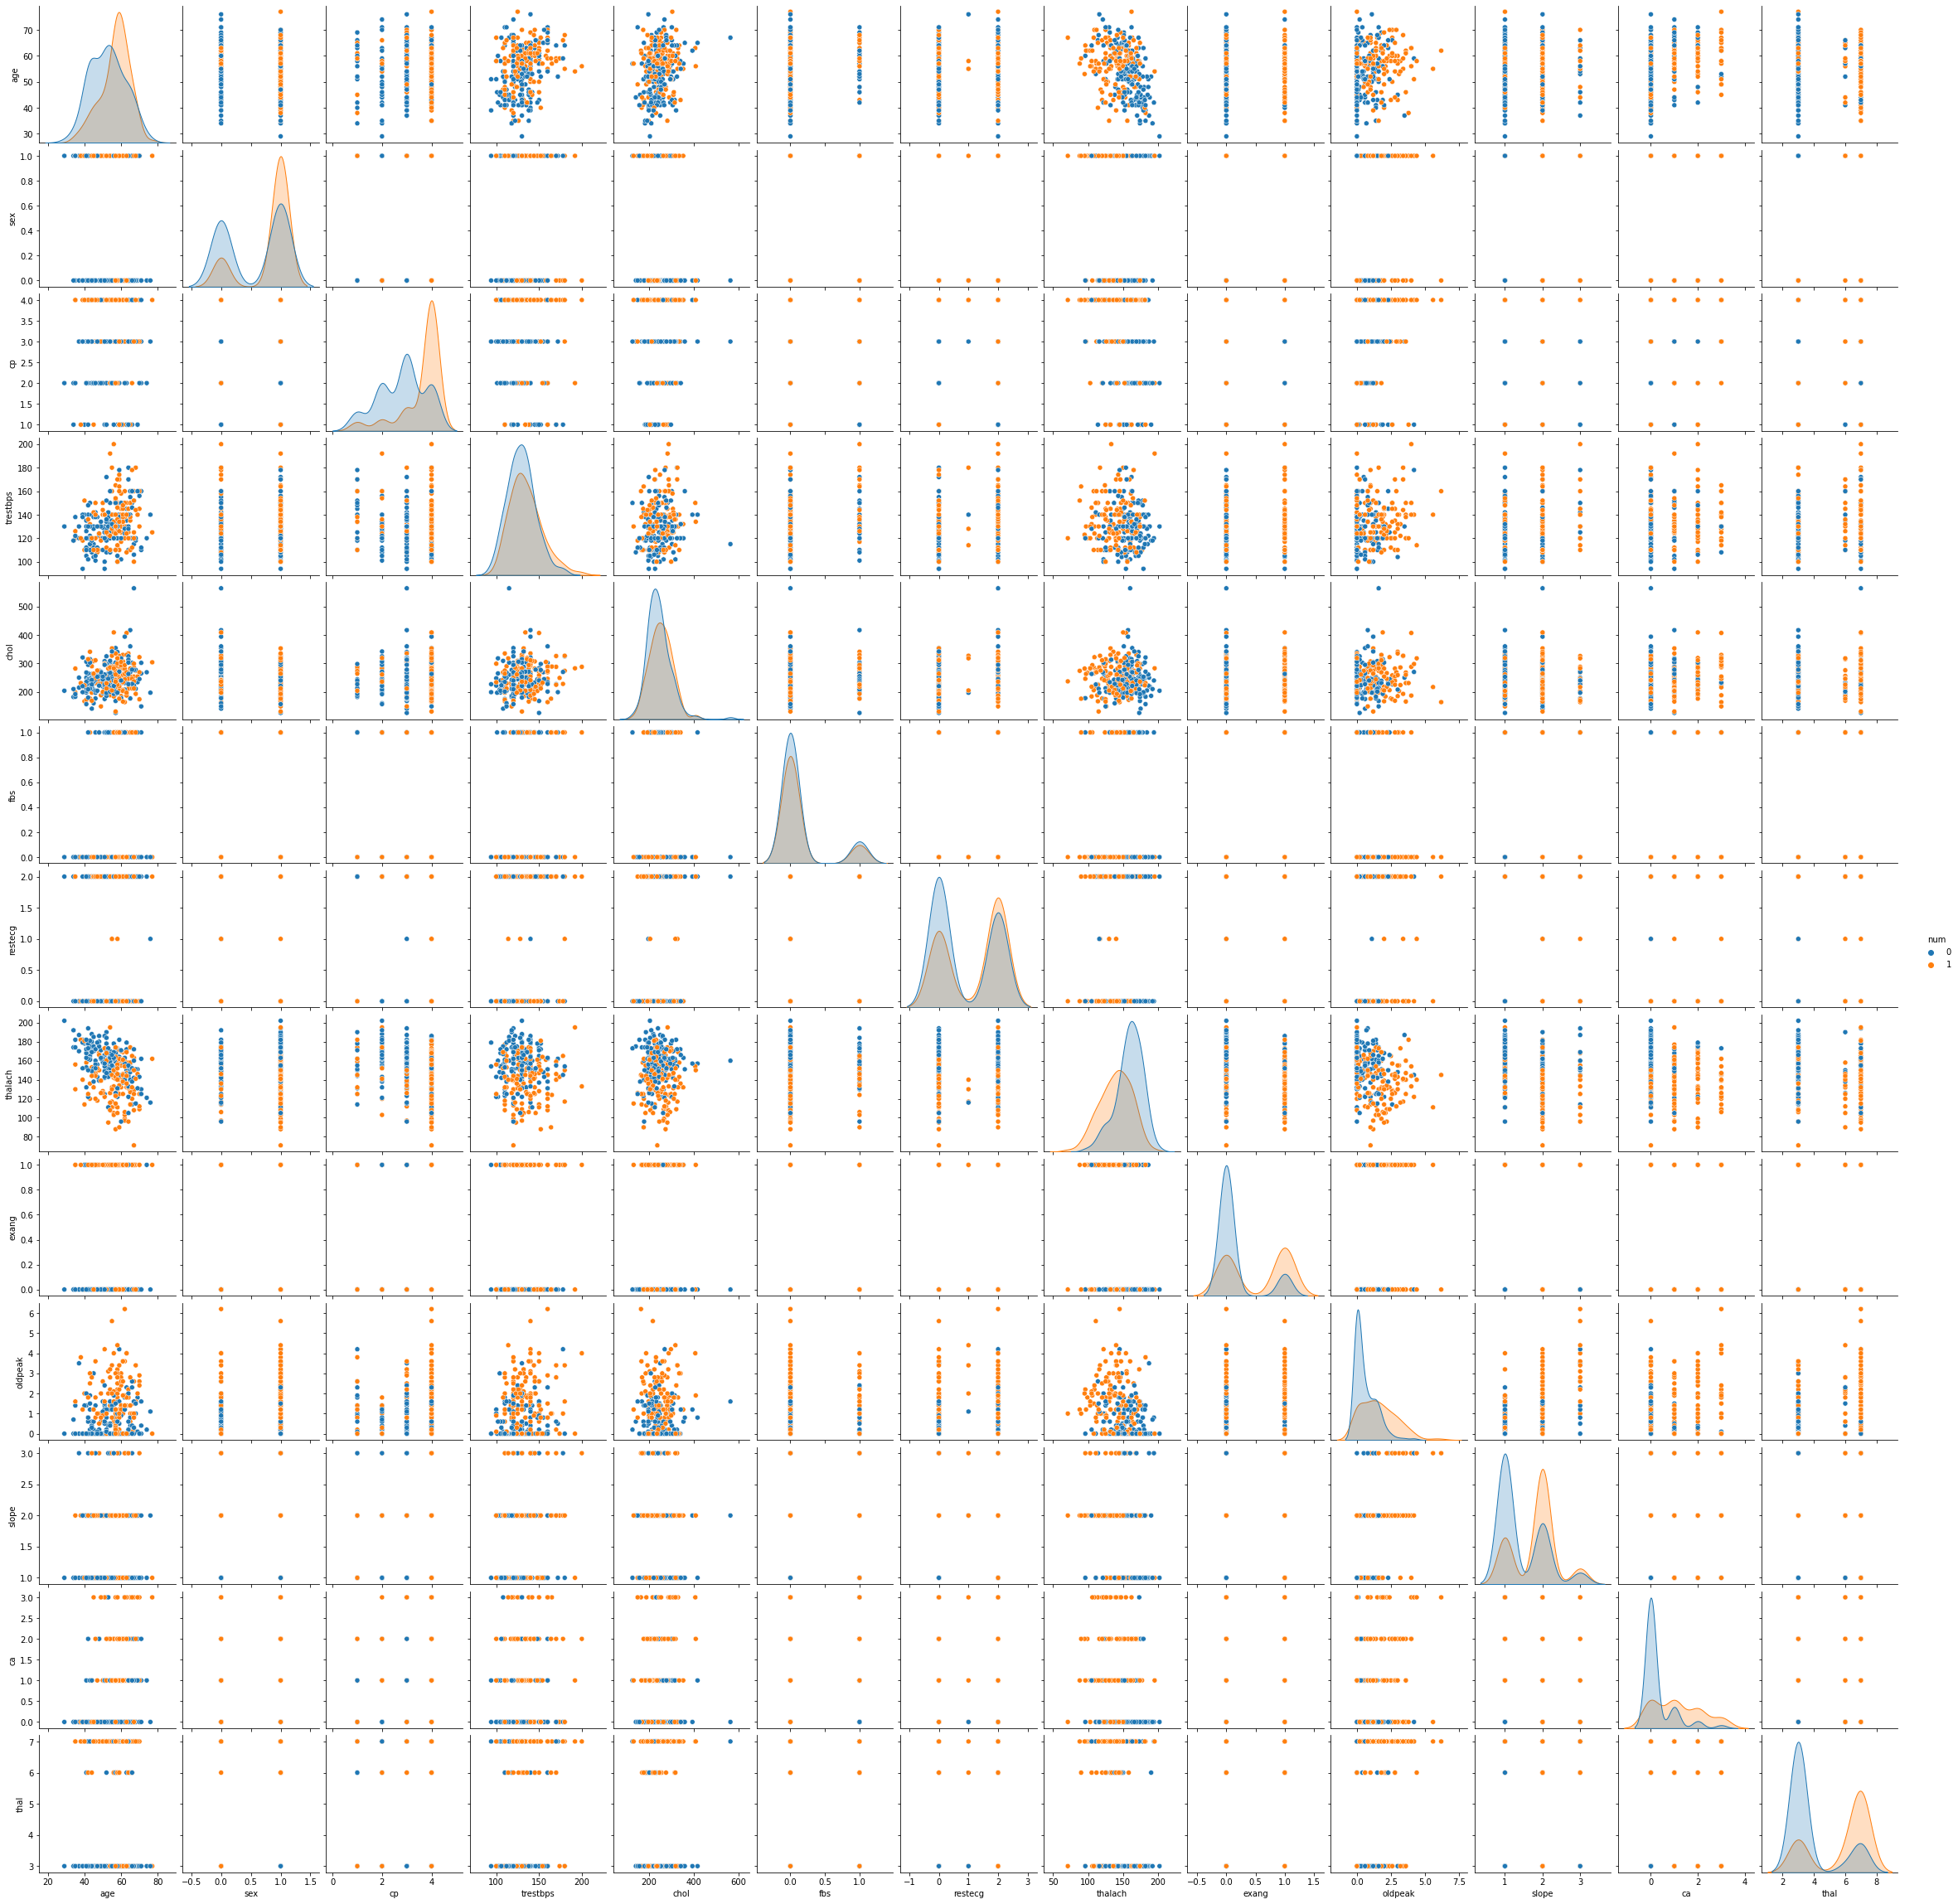

In [5]:
sns.pairplot(df, hue = 'num')

In [6]:
# split the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Hard Margin

In [8]:
# Load the Support Vector Machine Classifier
model_hard = SVC(kernel='poly', C=1000, degree=1)   # try with different kernels
model_hard.fit(x_train, y_train)
y_pred_hard = model_hard.predict(x_test)

In [9]:
# Model Report
print("Report:",classification_report(y_test, y_pred_hard))

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_hard))

# Model Precision
print("Precision:",precision_score(y_test, y_pred_hard))

# Model Recall
print("Recall:",recall_score(y_test, y_pred_hard))

Report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Accuracy: 0.8666666666666667
Precision: 0.8333333333333334
Recall: 0.8333333333333334


## Soft Margin

In [10]:
# Load the Support Vector Machine Classifier
model_soft = SVC(kernel='poly', C=1,degree=1)   # try with different kernels
model_soft.fit(x_train, y_train)
y_pred_soft = model_soft.predict(x_test)

In [11]:
# Model Report
print("Report:",classification_report(y_test, y_pred_soft))

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_soft))

# Model Precision
print("Precision:",precision_score(y_test, y_pred_soft))

# Model Recall
print("Recall:",recall_score(y_test, y_pred_soft))

Report:               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

Accuracy: 0.8833333333333333
Precision: 0.84
Recall: 0.875


## GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {'C':[1,2,3,4,5,6,7,8,14,100,500,1000,2000], 'gamma':[1.0, 0.1, 0.01, 0.001, 0.0001], 'kernel':['linear', 'poly', 'rbf'], 'degree': [1,2,3,4,5]}
grid = GridSearchCV(param_grid= param_grid, estimator= SVC(), scoring='f1', refit= True, verbose=1)

In [14]:
grid.fit(x_train, y_train)
grid.best_params_

Fitting 5 folds for each of 975 candidates, totalling 4875 fits


{'C': 6, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [15]:
y_pred_grid = grid.predict(x_test)

In [16]:
# Model Report
print("Report:",classification_report(y_test, y_pred_grid))

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_grid))

# Model Precision
print("Precision:",precision_score(y_test, y_pred_grid))

# Model Recall
print("Recall:",recall_score(y_test, y_pred_grid))

Report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

Accuracy: 0.9
Precision: 0.875
Recall: 0.875


## Narrow down the grid search

In [17]:
param_grid = {'C':[4,5,6,7,8], 'gamma':np.linspace(0.0, 0.2, 10), 'kernel':['poly'], 'degree': [1,2,3,4,5]}
classifier = GridSearchCV(param_grid= param_grid, estimator= SVC(probability= True), scoring='f1', refit= True, verbose=1)

In [18]:
classifier.fit(x_train, y_train)
classifier.best_params_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


{'C': 4, 'degree': 1, 'gamma': 0.15555555555555556, 'kernel': 'poly'}

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
# Model Report
print("Report:",classification_report(y_test, y_pred))

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",precision_score(y_test, y_pred))

# Model Recall
print("Recall:",recall_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

Accuracy: 0.9
Precision: 0.875
Recall: 0.875


## Results

Hard Margin accuracy = 86.67% <br>
Soft Margin accuracy = 88.33% <br>
Grid Search Accuracy = 90% <br>
with C=4, degree=1, gamma=0.15555555555555556, kernel='poly'